<a href="https://colab.research.google.com/github/lydiahsu/SHP_Fall_2019/blob/ipynb/sklearn_4_crossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

# load data
iris = load_iris()
X = iris.data
y = iris.target

# split into training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# model building 
# default neighbor = 5 
knn = KNeighborsClassifier()

# training
knn.fit(X_train, y_train)

# precision
print(knn.score(X_test, y_test))
# 0.973684210526

0.9736842105263158


In [0]:
from sklearn.model_selection import cross_val_score # k-fold cross validation

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(scores)

# average
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


**Change the number of neighbors**

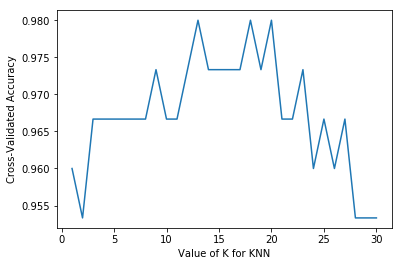

In [0]:
import matplotlib.pyplot as plt

# set model parameter
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plots
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**Second example**

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits 
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
digits = load_digits()
X = digits.data
y = digits.target

In [0]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [0]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

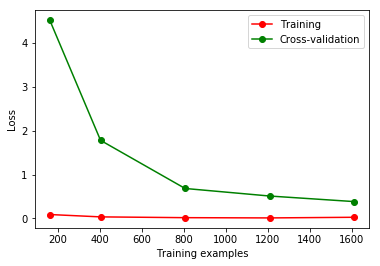

In [0]:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

**Third Example**

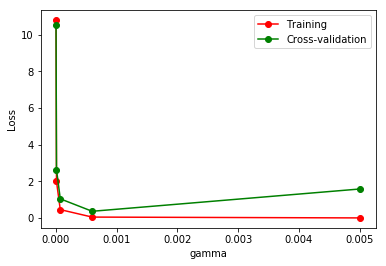

In [0]:
from sklearn.model_selection import validation_curve 
#from sklearn.datasets import load_digits 
#from sklearn.svm import SVC 
#import matplotlib.pyplot as plt 
#import numpy as np


#digits = load_digits()
#X = digits.data
#y = digits.target

# parameter range setup
param_range = np.logspace(-6, -2.3, 5)

train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# plots
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()